In [253]:
import sklearn
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import seaborn as seabornInstance 
import seaborn as sns
from scipy import stats 
%matplotlib inline
import xgboost as xg

In [254]:
# Imporatation de données

df=pd.read_csv('consommation_électrique.csv')

In [255]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address,State,ZipCode,BuildingAge
0,28,2015,SPS-District K-12,K-12 School,GRAHAM HILL ELEMENTARY SCHOOL (SPS-DISTRICT),SOUTHEAST,1961,1.0,2.0,56228,...,911659.0,542600.0,35.17,0.56,47.545701,-122.268584,5101 S GRAHAM ST,WA,98118.0,54
1,29,2015,NonResidential,Hotel,WATERTOWN HOTEL,NORTHEAST,2001,1.0,6.0,88592,...,2254751.0,1626149.0,102.08,1.04,47.659533,-122.317393,4242 ROOSEVELT WAY NE,WA,98105.0,14
2,31,2015,NonResidential,Other,SEATTLE HONDA,DOWNTOWN,1930,1.0,2.0,67224,...,1388775.0,0.0,9.68,0.06,47.614906,-122.330401,1017 OLIVE WAY,WA,98101.0,85
3,35,2015,NonResidential,Hotel,Hotel Five,DOWNTOWN,1978,1.0,5.0,68410,...,2276244.0,2065556.0,125.57,1.69,47.615870,-122.341980,2200 5TH AVE,WA,98121.0,37
4,37,2015,SPS-District K-12,K-12 School,JOHN HAY ELEMENTARY SCHOOL (SPS-DISTRICT),MAGNOLIA / QUEEN ANNE,1989,1.0,2.0,51582,...,1472609.0,0.0,10.27,0.08,47.633032,-122.352457,201 GARFIELD ST,WA,98109.0,26


In [256]:
list(df.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'Address',
 'State',
 'ZipCode',
 'BuildingAge']

### Feature Selection and Engineering  ¶


In [257]:
## Feature selection pour l'émission d'énergie

df_émission=df[['BuildingAge','BuildingType', 'PrimaryPropertyType','LargestPropertyUseType','Neighborhood','PropertyGFATotal','NumberofFloors','TotalGHGEmissions','SiteEUI(kBtu/sf)']]
df_émission

,BuildingAge,BuildingType,PrimaryPropertyType,LargestPropertyUseType,Neighborhood,PropertyGFATotal,NumberofFloors,TotalGHGEmissions,SiteEUI(kBtu/sf)
0,54,SPS-District K-12,K-12 School,K-12 School,SOUTHEAST,56228,2.0,35.17,25.100000
1,14,NonResidential,Hotel,Hotel,NORTHEAST,88592,6.0,102.08,66.900000
2,85,NonResidential,Other,Automobile Dealership,DOWNTOWN,67224,2.0,9.68,20.700000
3,37,NonResidential,Hotel,Hotel,DOWNTOWN,68410,5.0,125.57,90.500000
4,26,SPS-District K-12,K-12 School,K-12 School,MAGNOLIA / QUEEN ANNE,51582,2.0,10.27,26.700000
...,...,...,...,...,...,...,...,...,...
2182,2,NonResidential,Hotel,Hotel,LAKE UNION,126823,4.0,131.02,68.500000
2183,61,NonResidential,Warehouse,Non-Refrigerated Warehouse,GREATER DUWAMISH,52085,1.0,157.70,69.199997
2184,3,NonResidential,Other,Other - Recreation,NORTHEAST,72000,1.0,67.65,40.599998
2185,1,NonResidential,K-12 School,K-12 School,GREATER DUWAMISH,45000,3.0,9.24,29.000000


In [258]:
df_émission.describe()

,BuildingAge,PropertyGFATotal,NumberofFloors,TotalGHGEmissions,SiteEUI(kBtu/sf)
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,57.133059,53657.601738,2.496571,43.465569,46.717010
std,32.147378,37755.208484,1.530825,42.337535,27.341498
min,1.000000,16300.000000,0.000000,-0.800000,0.000000
25%,32.000000,27000.000000,1.000000,13.005000,27.500000
50%,53.000000,40304.000000,2.000000,30.790000,42.599998
75%,87.000000,64587.000000,3.000000,59.180000,62.500000
max,116.000000,213283.000000,8.000000,230.450000,150.200000


In [259]:

## Logarithmique Transformation pour réduire l'asymétrie.

# Nous n'avons pas pu transformer logarithmique les consommations d'énergie et les émissions de CO2 en raison de la présence de 0 et de valeurs négative

df_émission[['PropertyGFATotal']]=np.log(df_émission[['PropertyGFATotal']])
df_émission[['PropertyGFATotal']]

C:\Users\Tewod\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,PropertyGFATotal
0,10.937170
1,11.391797
2,11.115786
3,11.133274
4,10.850928
...,...
2182,11.750548
2183,10.860632
2184,11.184421
2185,10.714418


In [260]:
## Nous changeons les données catagoriques en numérique en utilisant LabelEncoder()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_émission[['BuildingType', 'PrimaryPropertyType','LargestPropertyUseType','Neighborhood']] = df_émission[['BuildingType', 'PrimaryPropertyType','LargestPropertyUseType','Neighborhood']].apply(le.fit_transform)
df_émission[['BuildingType', 'PrimaryPropertyType','LargestPropertyUseType','Neighborhood']].head()

C:\Users\Tewod\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,BuildingType,PrimaryPropertyType,LargestPropertyUseType,Neighborhood
0,4,5,11,16
1,1,4,10,12
2,1,12,1,5
3,1,4,10,5
4,4,5,11,10


In [261]:
df_émission

,BuildingAge,BuildingType,PrimaryPropertyType,LargestPropertyUseType,Neighborhood,PropertyGFATotal,NumberofFloors,TotalGHGEmissions,SiteEUI(kBtu/sf)
0,54,4,5,11,16,10.937170,2.0,35.17,25.100000
1,14,1,4,10,12,11.391797,6.0,102.08,66.900000
2,85,1,12,1,5,11.115786,2.0,9.68,20.700000
3,37,1,4,10,5,11.133274,5.0,125.57,90.500000
4,26,4,5,11,10,10.850928,2.0,10.27,26.700000
...,...,...,...,...,...,...,...,...,...
2182,2,1,4,10,9,11.750548,4.0,131.02,68.500000
2183,61,1,26,19,8,10.860632,1.0,157.70,69.199997
2184,3,1,12,27,12,11.184421,1.0,67.65,40.599998
2185,1,1,5,11,8,10.714418,3.0,9.24,29.000000


 ### Distribution des données

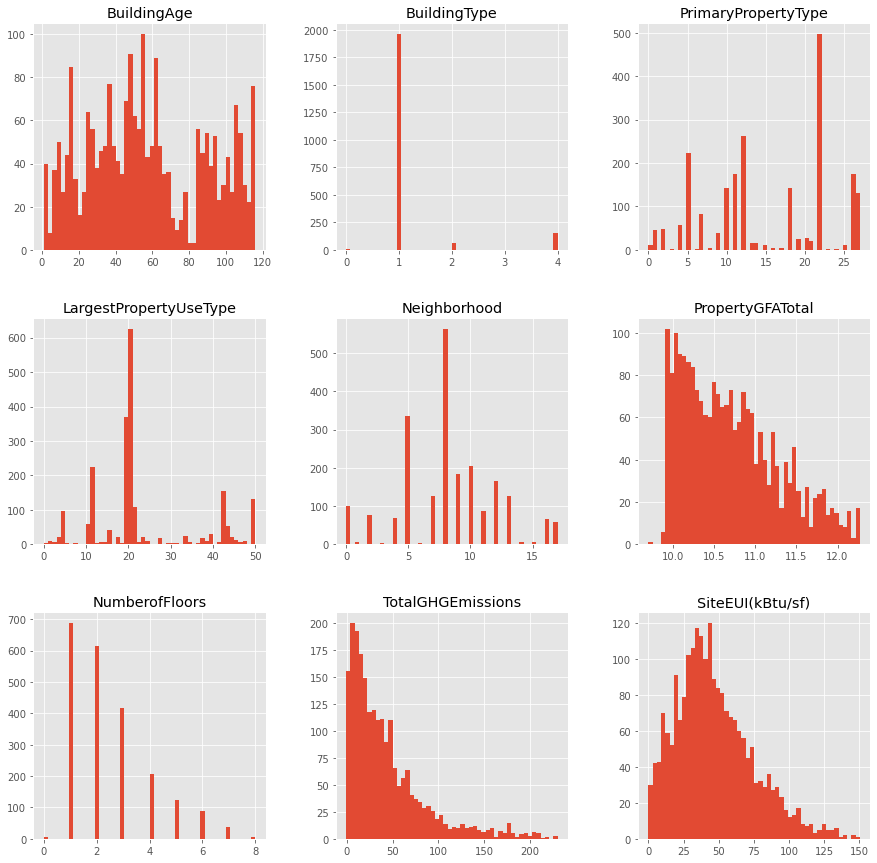

In [262]:
df_émission.hist(bins=50, figsize=(15,15))
plt.show()

## Classification des fonctionnalités et étiquette

In [264]:
# TotalGHGEmissions est considéré comme mesurant les émissions de CO2 des variables

X = df_émission.drop(['TotalGHGEmissions'], axis=1)
y = df_émission['TotalGHGEmissions']

### Diviser les données en données d'entraînement et de test

In [265]:
# Cette opération est important avant la normalisation des données afin d'éviter les fuites de données

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33,random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))


Entrainement: 1465 lignes,
Test: 722 lignes.



### Standardisation de la jeux d'entrainment

In [266]:

from sklearn import preprocessing


Scaler = preprocessing.StandardScaler()

Scaler.fit(X_train)

X_train=Scaler.transform(X_train)

X_test= Scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)

In [267]:
X_train

,BuildingAge,BuildingType,PrimaryPropertyType,LargestPropertyUseType,Neighborhood,PropertyGFATotal,NumberofFloors,SiteEUI(kBtu/sf)
0,0.879689,-0.311795,-1.301144,-0.950521,0.718705,-1.073227,-0.317719,-0.461634
1,-0.581296,-0.311795,0.100362,1.423620,0.182740,-0.896138,-0.317719,3.435582
2,-1.265161,-0.311795,0.864820,-0.238278,-2.229101,-0.751675,0.989748,-0.040807
3,-0.923229,-0.311795,-0.791506,-0.633969,0.718705,-0.751854,0.336015,-0.000555
4,0.599926,-0.311795,1.247050,-1.583625,0.182740,-0.134927,-0.317719,0.815482
...,...,...,...,...,...,...,...,...
1460,-1.234076,-0.311795,-0.409276,0.790516,-0.353225,1.121193,-0.317719,2.048686
1461,-0.115024,0.936235,-0.409276,-0.159140,0.450723,-0.742403,-0.971452,1.741300
1462,-0.332618,-0.311795,0.864820,-0.238278,0.450723,0.918521,0.989748,0.800845
1463,0.071484,-0.311795,1.374459,-0.317416,-0.085242,0.222331,-0.971452,0.142160


In [268]:
X_train.mean(axis=0)

BuildingAge              -4.857699e-17
BuildingType              3.402663e-17
PrimaryPropertyType       1.756653e-16
LargestPropertyUseType    5.329449e-17
Neighborhood              2.081005e-16
PropertyGFATotal         -2.562872e-15
NumberofFloors           -1.141673e-16
SiteEUI(kBtu/sf)          3.789157e-19
dtype: float64

In [269]:
X_train.std(axis=0)


BuildingAge               1.000341
BuildingType              1.000341
PrimaryPropertyType       1.000341
LargestPropertyUseType    1.000341
Neighborhood              1.000341
PropertyGFATotal          1.000341
NumberofFloors            1.000341
SiteEUI(kBtu/sf)          1.000341
dtype: float64

In [270]:
X_test=pd.DataFrame(X_test, columns=X.columns)
X_test

,BuildingAge,BuildingType,PrimaryPropertyType,LargestPropertyUseType,Neighborhood,PropertyGFATotal,NumberofFloors,SiteEUI(kBtu/sf)
0,-1.310348,-0.281202,-0.654445,-0.204605,0.775781,-0.607683,0.967441,-0.304843
1,1.590372,-0.281202,-1.804412,-1.548321,-0.023620,0.417768,0.967441,-1.051183
2,-0.093917,-0.281202,-0.398896,-0.120623,-0.023620,-0.783493,-0.990949,-1.354840
3,-0.374632,-0.281202,0.878846,-0.204605,-0.023620,-0.760862,-0.338152,-0.030454
4,0.872989,-0.281202,-0.015574,1.391057,1.042249,-1.183390,0.314644,-0.604843
...,...,...,...,...,...,...,...,...
717,1.216085,-0.281202,-0.398896,-0.120623,-0.023620,-0.901555,-0.990949,0.415886
718,1.777515,-0.281202,0.878846,-0.204605,-0.823022,-0.548901,-0.338152,1.868321
719,-1.341538,-0.281202,-1.421090,-1.044427,0.242847,2.104672,2.925830,0.485398
720,-0.125108,-0.281202,-0.398896,0.047342,0.509314,-1.119772,0.314644,1.513444


In [271]:
y_train

1801     19.51
1970     97.27
570       6.46
654      27.99
1912     61.68
         ...  
1638     77.76
1095     48.95
1130     48.76
1294    107.16
860      27.90
Name: TotalGHGEmissions, Length: 1465, dtype: float64

In [272]:
y_test

1846      6.41
1316      7.37
764       2.04
1550      8.85
993       4.79
         ...  
817      18.91
710     103.40
15      191.58
925      81.02
1091     25.27
Name: TotalGHGEmissions, Length: 722, dtype: float64

## La répartition des fonctionnalités (jeux d'entrainement)

<AxesSubplot:xlabel='SiteEUI(kBtu/sf)', ylabel='Count'>

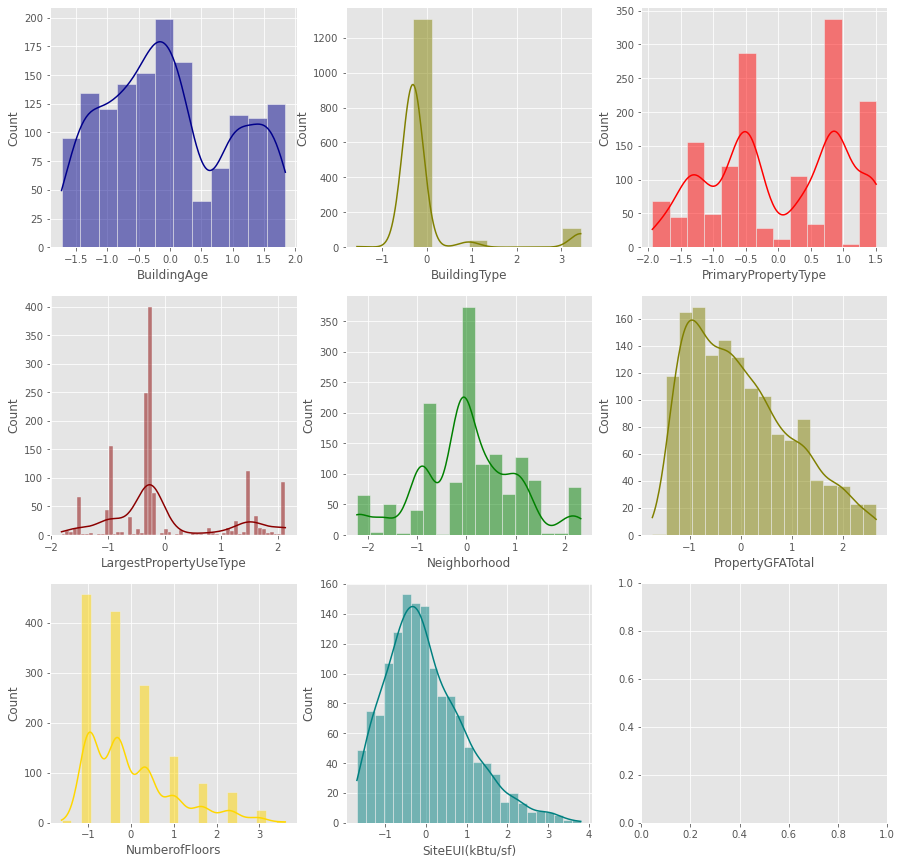

In [273]:


# On ne trouve pas de distribution normale dans les fonctionnalités Entraînement

# Ils sont soit asymétriques, soit à distribution bimodale et multimodale


fig, axs = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(data=X_train, x="BuildingAge", kde=True, color="Darkblue", ax=axs[0,0])
sns.histplot(data=X_train, x="BuildingType", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=X_train, x="PrimaryPropertyType", kde=True, color="red", ax=axs[0,2])
sns.histplot(data=X_train, x="LargestPropertyUseType", kde=True, color="darkred", ax=axs[1, 0])
sns.histplot(data=X_train, x="Neighborhood", kde=True, color="Green", ax=axs[1, 1])
sns.histplot(data=X_train, x="PropertyGFATotal", kde=True, color="olive", ax=axs[1, 2])
sns.histplot(data=X_train, x="NumberofFloors", kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data=X_train, x="SiteEUI(kBtu/sf)", kde=True, color="teal", ax=axs[2, 1])

## La répartition des fonctionnalités (Jeux de TEST)

<AxesSubplot:xlabel='SiteEUI(kBtu/sf)', ylabel='Count'>

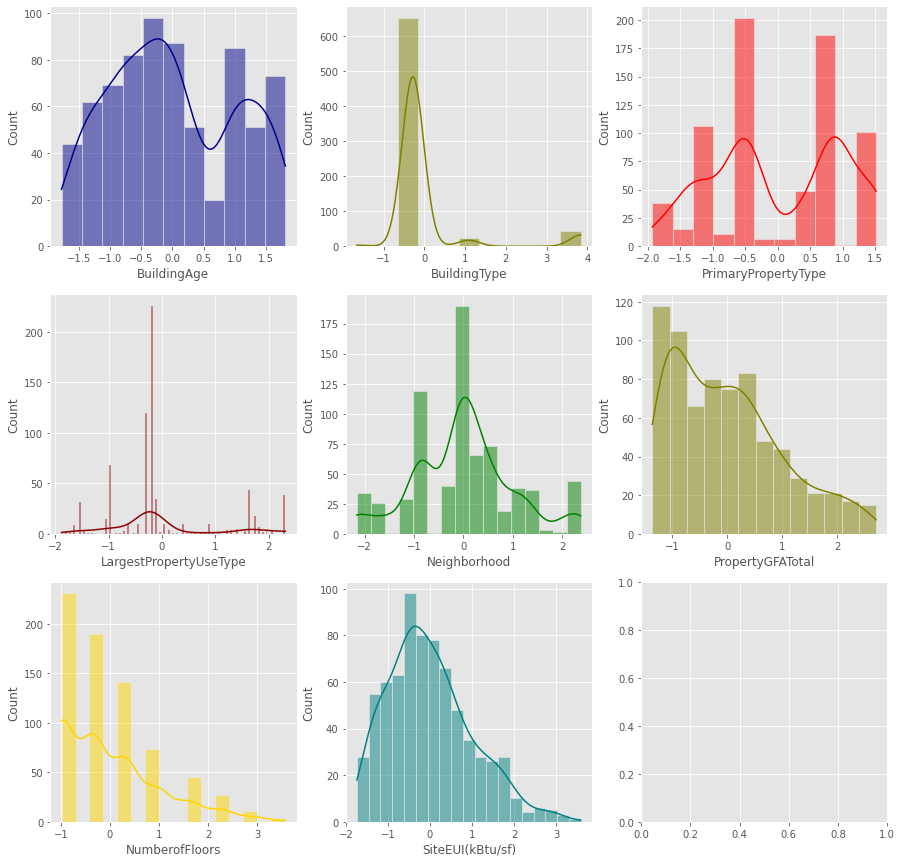

In [274]:

# On ne trouve pas de distribution normale dans les fonctionnalités TEST

# Ils sont soit asymétriques, soit à distribution bimodale et multimodale


fig, axs = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(data=X_test, x="BuildingAge", kde=True, color="Darkblue", ax=axs[0,0])
sns.histplot(data=X_test, x="BuildingType", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=X_test, x="PrimaryPropertyType", kde=True, color="red", ax=axs[0,2])
sns.histplot(data=X_test, x="LargestPropertyUseType", kde=True, color="darkred", ax=axs[1, 0])
sns.histplot(data=X_test, x="Neighborhood", kde=True, color="Green", ax=axs[1, 1])
sns.histplot(data=X_test, x="PropertyGFATotal", kde=True, color="olive", ax=axs[1, 2])
sns.histplot(data=X_test, x="NumberofFloors", kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data=X_test, x="SiteEUI(kBtu/sf)", kde=True, color="teal", ax=axs[2, 1])

### Feature Selection: Méthode des écarts

In [275]:

# La méthode Variande est l'une des méthodes de sélection des fonctionnalités. Il élimine les fonctionnalités à faible variance

# En raison de la standardisation, la variance de la fonctionnalité est de 1

X_train.var()

BuildingAge               1.000683
BuildingType              1.000683
PrimaryPropertyType       1.000683
LargestPropertyUseType    1.000683
Neighborhood              1.000683
PropertyGFATotal          1.000683
NumberofFloors            1.000683
SiteEUI(kBtu/sf)          1.000683
dtype: float64

In [276]:
# Nous voulons éliminer les fonctionnalités dont la variance est inférieure au seuil. Default est Zero
# En effet, aucune des fonctionnalités ne présente une variance inférieure. C'est pourquoi nous les gardons.

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.02))
sel.fit(X_train)

print("Feature selection", sel.get_support())
print("Selected features:", list(X.columns[sel.get_support()]))
print("Removed features:", list(X.columns[~sel.get_support()]))

Feature selection [ True  True  True  True  True  True  True  True]
Selected features: ['BuildingAge', 'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'Neighborhood', 'PropertyGFATotal', 'NumberofFloors', 'SiteEUI(kBtu/sf)']
Removed features: []


### Coefficient de corrélation de Pearson

<AxesSubplot:>

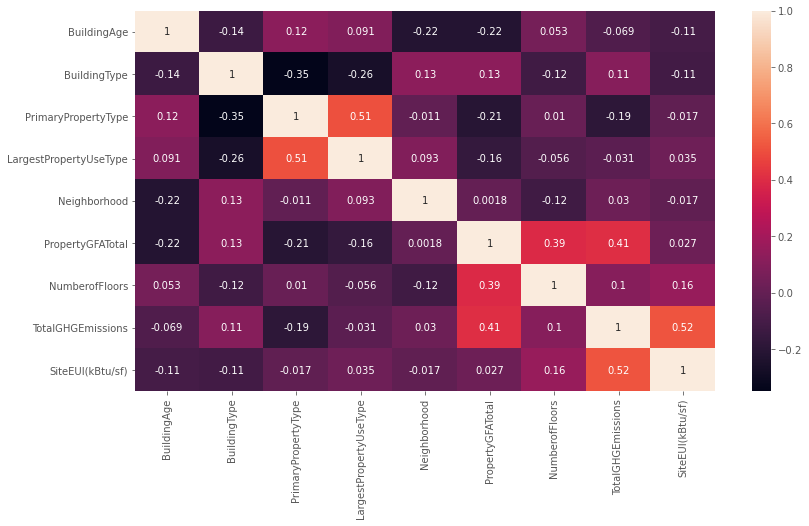

In [263]:
# Une autre façon d'observer la relation entre les variables et ces variables et la variable indépendante est le coefficient de corrélation.
# Nous pouvons noter que la relation linéaire n'est pas forte entre les variables et avec les variables indépendantes

cor=df_émission.corr()
plt.figure(figsize=(13,7))
sns.heatmap(cor,annot=True)

## Modélisation d'émission de CO2: TotalGHGEmissions

### Les Modèles : LinearRegression ,KNeighborsRegressor, Gradient BoostingRegressor , RandomForestRegressor, XGBRegressor 

### Baseline Regression

In [277]:

# Algorithms de Sklearn regression 

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
import xgboost as xg

#Fonctions d'évaluation du modèle de régression Sklearn

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


# Construisez des modèles et comparez-les aux données d'entraînement à l'aide de MAE, RMSE and R2


models = [LinearRegression(),KNeighborsRegressor(), GradientBoostingRegressor(),RandomForestRegressor(),xg.XGBRegressor()]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_train, predictions))
    print("    RMSE", sqrt(mean_squared_error(y_train, predictions)))
    print("    R2", r2_score(y_train, predictions))

LinearRegression
    MAE 22.841573094180088
    RMSE 31.266857071629357
    R2 0.4787654365539358
KNeighborsRegressor
    MAE 16.22439726962457
    RMSE 24.107021199602592
    R2 0.6901497511901592
GradientBoostingRegressor
    MAE 14.105251525854158
    RMSE 19.18713928046531
    R2 0.8037158616283208
RandomForestRegressor
    MAE 5.449830102389077
    RMSE 8.546611200530343
    R2 0.9610549160006399
XGBRegressor
    MAE 2.081709578979951
    RMSE 3.0134323428630765
    R2 0.9951584141172151


### Explorer les métriques d'évaluation sur l'ensemble de TEST

In [278]:
models = [LinearRegression(),KNeighborsRegressor(), GradientBoostingRegressor(),RandomForestRegressor(),xg.XGBRegressor()]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test, predictions))
    print("    MSE", mean_squared_error(y_test, predictions))
    print("    RMSE", sqrt(mean_squared_error(y_test, predictions)))
    print("    R2", r2_score(y_test, predictions))

LinearRegression
    MAE 22.034221724774213
    MSE 900.0397141886333
    RMSE 30.00066189584212
    R2 0.4440863062476089
KNeighborsRegressor
    MAE 19.180072022160665
    MSE 789.8285825152354
    RMSE 28.103889099468695
    R2 0.512158721648102
GradientBoostingRegressor
    MAE 17.89123172808052
    MSE 630.4242056515798
    RMSE 25.108249752851744
    R2 0.6106155725465733
RandomForestRegressor
    MAE 15.144764681440442
    MSE 518.5040843837259
    RMSE 22.770684758779783
    R2 0.6797435532771974
XGBRegressor
    MAE 14.63683613672316
    MSE 532.7813947189203
    RMSE 23.08205785277648
    R2 0.6709251064907218


In [279]:
# La différence entre les résultats des ensembles de données d'entraînement et de test indique la présence de sur-apprentissage.

# Nous avons choisi GridSearchCV pour Hyperparameter Tunning afin d'améliorer les performances des modèles.

### Réglage des hyperparamètres: GridSearchCV  d'émission de CO2

In [306]:
# Nous avons choisi trois modèles pour l'optimisation des hyperparamètres
# GradientBoostingRegressor # Random Forest Regression # Xboost Regressor

## 1. XGboost Regressor

In [293]:
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor(random_state=42)

# définition de la plage de paramètres

parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,200,300,500],
                  'max_depth'    : [4,6,8,10]
                 }


xgb_grid = GridSearchCV(xgb1,
                        param_grid=parameters,
                        n_jobs = -1)

xgb_grid.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=42,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
        

In [294]:
xgb_grid.best_params_

{'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.5}

In [295]:
Best_xgb_grid=xgb_grid.best_estimator_
Best_xgb_grid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Explorer les métriques d'évaluation sur l'ensemble de test

In [296]:
print("Résultats de Grid Search_XGboost Regressor" )
y_predict=Best_xgb_grid.predict(X_test)
print("    MAE", mean_absolute_error(y_test, y_predict))
print("    MSE", mean_squared_error(y_test, y_predict))
print("    RMSE", sqrt(mean_squared_error(y_test, y_predict)))
print("    R2", r2_score(y_test,  y_predict))
print("\n Les meilleurs paramètres parmi TOUS les paramètres recherchés:\n",xgb_grid.best_params_)

Résultats de Grid Search_XGboost Regressor
    MAE 13.285476632007603
    MSE 453.29571724107336
    RMSE 21.29074252441829
    R2 0.7200198029474831

 Les meilleurs paramètres parmi TOUS les paramètres recherchés:
 {'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.5}


## 2.GradientBoostingRegressor

In [284]:
GBR = GradientBoostingRegressor(random_state=42)

# defining parameter range 
parameters_gb = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,200,300],
                  'max_depth'    : [4,6,8,10]
                 }


grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters_gb, n_jobs=-1)

grid_GBR.fit(X_train, y_train)
 

GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [285]:
grid_GBR.best_params_

{'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.5}

In [286]:
Best_grid=grid_GBR.best_estimator_
Best_grid

GradientBoostingRegressor(learning_rate=0.04, max_depth=10, n_estimators=300,
                          random_state=42, subsample=0.5)

### Explorer les métriques d'évaluation sur l'ensemble de test

In [287]:
print(" Résultats de Grid Search_GradientBoostingRegressor " )
y_pred=Best_grid.predict(X_test)
print("    MAE", mean_absolute_error(y_test, y_pred))
print("    MSE", mean_squared_error(y_test, y_pred))
print("    RMSE", sqrt(mean_squared_error(y_test, y_pred)))
print("    R2", r2_score(y_test,  y_pred))
print("\n Les meilleurs paramètres parmi TOUS les paramètres recherchés:\n",grid_GBR.best_params_)

 Résultats de Grid Search_GradientBoostingRegressor 
    MAE 13.646648040452376
    MSE 473.3005366479149
    RMSE 21.755471418655006
    R2 0.7076637336829928

 Les meilleurs paramètres parmi TOUS les paramètres recherchés:
 {'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.5}


## 3. RandomForestRegressor 

In [288]:
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=42)

param_rf  = {'max_features' : ['sqrt', 'log2'],
             'max_depth': [5, 15, 25, 50],
             'min_samples_split': [2, 5, 10],
             'bootstrap' : [True, False],
             'min_samples_leaf': [1,2,5,10]}

In [289]:
gd_search = GridSearchCV(estimator = rfr, param_grid = param_rf, n_jobs=-1)

gd_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 15, 25, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [290]:
gd_search.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [291]:
Best_result=gd_search.best_estimator_
Best_result

RandomForestRegressor(bootstrap=False, max_depth=25, max_features='log2',
                      random_state=42)

### Explorer les métriques d'évaluation sur l'ensemble de test

In [292]:
print(" Résultats de Grid Search_ RandomForestRegressor " )
y_pred=Best_result.predict(X_test)
print("    MAE", mean_absolute_error(y_test, y_pred))
print("    MSE", mean_squared_error(y_test, y_pred))
print("    RMSE", sqrt(mean_squared_error(y_test, y_pred)))
print("    R2", r2_score(y_test, y_pred))

 Résultats de Grid Search_ RandomForestRegressor 
    MAE 13.252629852262237
    MSE 461.1528635624686
    RMSE 21.474470041481084
    R2 0.7151668001688031


### Conclusion
####  Les trois modèles affichent des scores approximatifs
#### La modèle avec une meilleure performance: XGBoostingRegressor

### Feature Importance: Émission de CO2

In [ ]:
# Il mesure l'importance relative des caractéristiques avant de passer à l'étape de prédiction.

In [297]:
# XGBoost regressor en utilisant les estimateurs recommandés

XGB=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=10,
             min_child_weight=1,monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [298]:

XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [299]:
XGB.feature_importances_

array([0.04563465, 0.09591538, 0.12217289, 0.11970831, 0.0616961 ,
       0.20227595, 0.11999692, 0.23259984], dtype=float32)

Text(0.5, 0, "XGBoosting Regressor Feature Importance sur l' Émission de CO2")

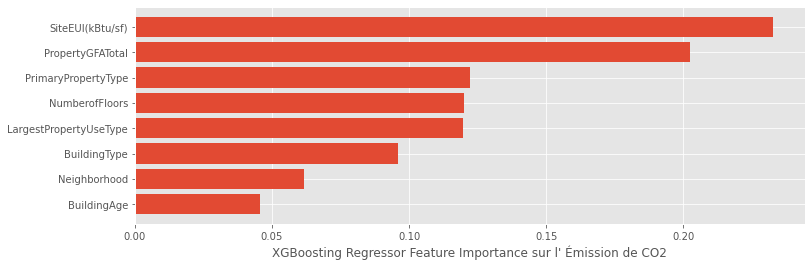

In [300]:
# Comme prévu, la consommation d'énergie a une importance plus grande tandis que l'âge du bâtiment a la moindre importance
# 'PropertyType', 'Number of floor', 'Largest property use type' ont le même niveau d'importance.
# Par conséquent, nous gardons toutes les fonctionnalités dans l'étape de prédiction

sorted_idx = XGB.feature_importances_.argsort()
fig, ax = plt.subplots(figsize=(12,4))
plt.barh(X.columns[sorted_idx], XGB.feature_importances_[sorted_idx])
plt.xlabel("XGBoosting Regressor Feature Importance sur l' Émission de CO2")

## Test de modèle sélectionné

 ### Prédiction des émissions de CO2 en utilisent XGBoostingRegressor  modèle

In [301]:
## Nous définissons les métriques pour MAE et R2

def metrics_model(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    r2 = 1-(sum(diff**2)/sum((y_true-np.mean(y_true))**2))
    dict_metrics = {"Métrique":["MAE", "R²"], "Résultats":[mae, r2]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [302]:
## Nous définissons pour tracer le graphique

def plot_pred_true(y_true, y_pred, color=None, title=None):
    X_plot = [y_true.min(), y_true.max()]
    fig = plt.figure(figsize=(12,8))
    plt.scatter(y_true, y_pred, color=color, alpha=.6)
    plt.plot(X_plot, X_plot, color='r')
    plt.xlabel("Valeurs réélles")
    plt.ylabel("Valeurs prédites")
    plt.title("Valeurs prédites VS valeurs réélles | Variable {}".format(title), 
              fontdict=None, fontsize=18)
    plt.show()

In [303]:
# Modèle avec les meilleurs paramètres pour les émissions de CO2

import time
start_time = time.time()

y_predict=Best_xgb_grid.predict(X_test)

print("Temps d'execution de l'agorithme : {:.2} s.".format((time.time() - start_time)))

Temps d'execution de l'agorithme : 0.014 s.


In [304]:
#Calcul des métriques pour les émissions de CO2

Émissions_metrics = metrics_model(y_test,y_predict)
Émissions_metrics

,Métrique,Résultats
0,MAE,13.285477
1,R²,0.720020


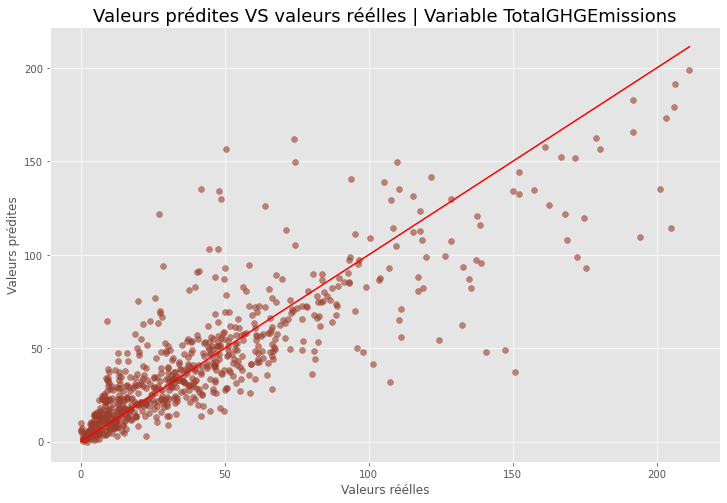

In [305]:
plot_pred_true(y_test ,y_predict, color="#9C3E2D", title="TotalGHGEmissions")

In [ ]:
## La capacité prédictive des modèles semble s'affaiblir après la valeur réelle (y_true) de 150.
## Il y a une sous-prédiction après 150.